<a href="https://colab.research.google.com/github/hida0/Python_MachineLearning/blob/sklearn/sklearn_4_%EC%95%99%EC%83%81%EB%B8%94%EB%AA%A8%EB%8D%B8_%EB%B3%B4%ED%8C%85_%EB%B0%B0%EA%B9%85(%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8)_%EB%B6%80%EC%8A%A4%ED%8C%85(GradientBoost%2CXGBoost%2CLGBM)_%EC%8A%A4%ED%83%9C%ED%82%B9_weighted_blending_K_%EA%B2%B9%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EC%9E%90%EB%8F%99%ED%99%94%ED%8A%9C%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 앙상블(Ensemble)
머신러닝 앙상블이란 **여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**이다.

> 여러 모델을 이용하여 데이터를 학습하고 모든 모델의 예측 결과를 평균하여 예측


[여러가지 앙상블 기법](https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble)

### 1-1. 앙상블 기법의 종류
- **보팅** (Voting): 여러 모델들 중에 투표를 통해 결과 도출
- **배깅** (Bagging): 샘플의 중복 생성을 통해 결과 도출
- **부스팅** (Boosting): 이전 오차를 보완하면서 가중치 부여
- **스태킹** (Stacking): 여러 모델을 기반으로 예측된 데이터를 학습 데이터로 사용하여 최종 meta 모델이 **final_estimator** 를 종합하여 다시 한번 예측


참고자료 (블로그)

* [보팅(Voting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [배깅(Bagging)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [부스팅(Boosting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

### 1-2. 실습을 위한 데이터셋 로드

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image

np.set_printoptions(suppress=True)

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

컬럼 소개

속성 수 : 13

* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

In [ ]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']

In [ ]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


train / test 데이터로 분할한다.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [ ]:
x_train.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76


In [ ]:
y_train.head(3)

182    37.9
155    15.6
280    45.4
Name: MEDV, dtype: float64

### 1-3. 평가 지표

#### 1) **MSE**(Mean Squared Error) : 예측값과 실제값의 차이에 대한 **제곱**에 대하여 평균을 낸 값

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [ ]:
from sklearn.metrics import mean_squared_error

#### 2) **MAE** (Mean Absolute Error) : 예측값과 실제값의 차이에 대한 **절대값**에 대하여 평균을 낸 값

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

In [ ]:
from sklearn.metrics import mean_absolute_error

#### 3) **RMSE** (Root Mean Squared Error) : 예측값과 실제값의 차이에 대한 **제곱에 대하여 평균을 낸 뒤 루트**를 씌운 값

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


### 1-4. 모델별 성능 확인을 위한 함수

#### 1) 예측값과 실제값의 산점도를 그려서 비교하는 함수

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(9, 6))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

#### 2) 각 알고리즘에 따른 예측값과 실제값의 MSE 값을 그래프로 나타내는 함수, 알고리즘 간의 비교에 유용

In [ ]:
def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual) # 정의한 함수를 통해 산점도 그래프를 그림

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True) # 모델 이름과 MSE 값을 MSE 값에 대해 내림차순으로 정리

    df = pd.DataFrame(y_value, columns=['model', 'mse']) # 모델이름과 MSE 값을 내림차순으로 정리한 데이터프레임 생성
    print(df) # 산점도 그래프 아래에 모델 이름과 MSE 값의 열을 가지는 데이터프레임을 출력
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(8, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=13)
    bars = ax.barh(np.arange(len(df)), df['mse']) # MSE 값을 수평막대그래프로 그림

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=15)
    plt.xlim(min_, max_)

    plt.show()


#### 3) 그렸던 그림을 제거하는 함수

In [ ]:
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

#### 4) 모델에 따른 각 열의 설명계수를 수평막대그래프로 그려서 나타내는 함수

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True) # coef 값을 내림차순으로 정렬

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    # fig.tight_layout()
    plt.show()

### 1-5. 단일 회귀예측 모델들의 MSE 비교 (지난 시간)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

1) 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(n_jobs=-1)

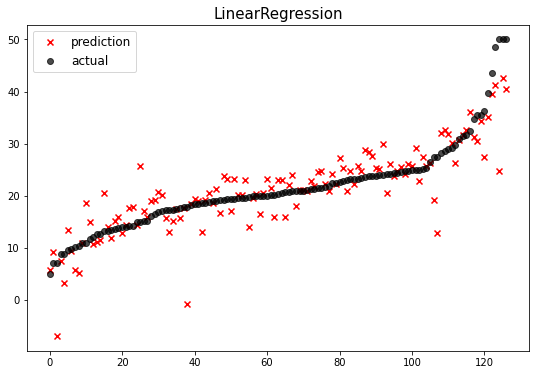

              model        mse
0  LinearRegression  22.098695


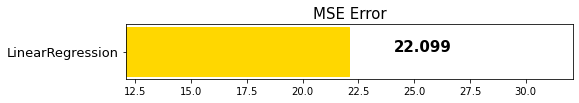

In [ ]:
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

2) 릿지

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

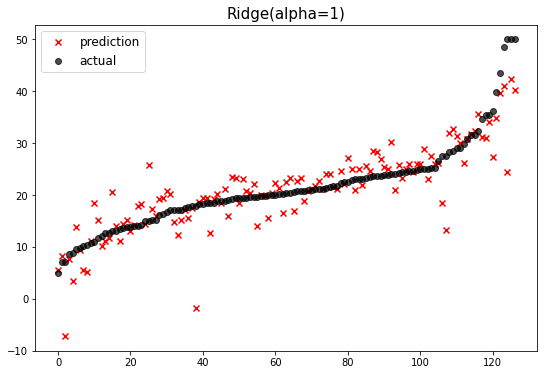

              model        mse
0    Ridge(alpha=1)  22.480476
1  LinearRegression  22.098695


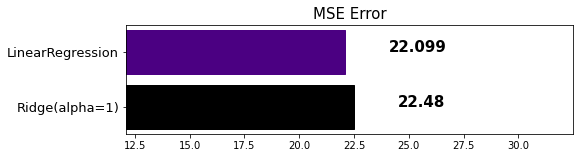

In [ ]:
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

3) 라쏘

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)

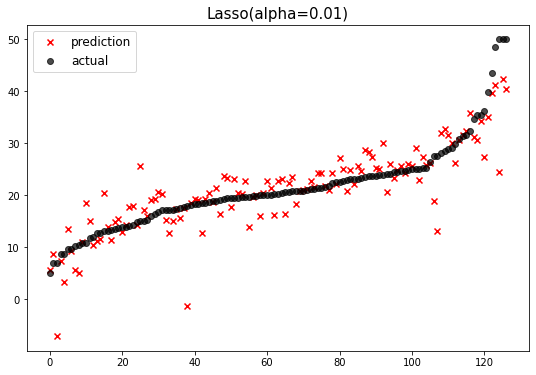

               model        mse
0     Ridge(alpha=1)  22.480476
1  Lasso(alpha=0.01)  22.210557
2   LinearRegression  22.098695


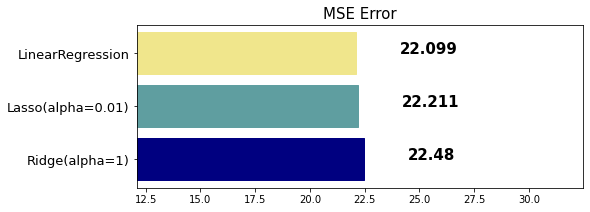

In [ ]:
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

4) 엘라스틱넷

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)

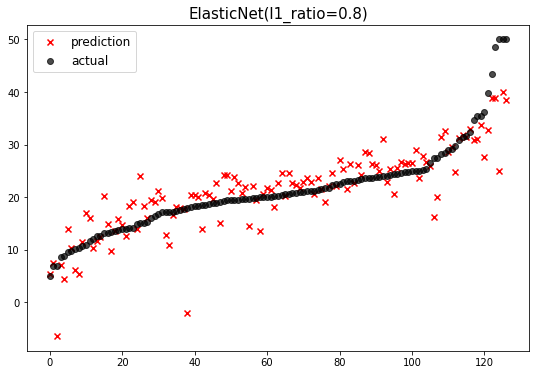

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1            Ridge(alpha=1)  22.480476
2         Lasso(alpha=0.01)  22.210557
3          LinearRegression  22.098695


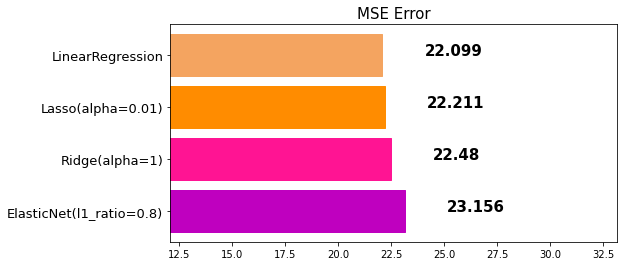

In [ ]:
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)

5) 파이프라인

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

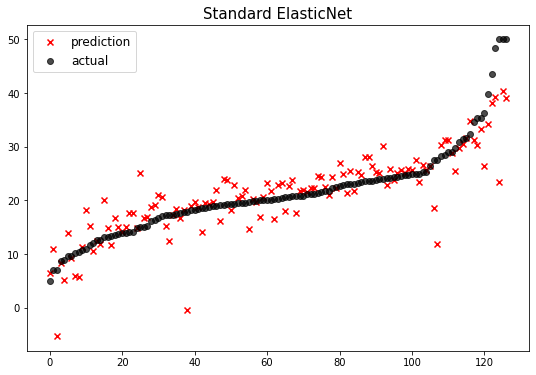

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695


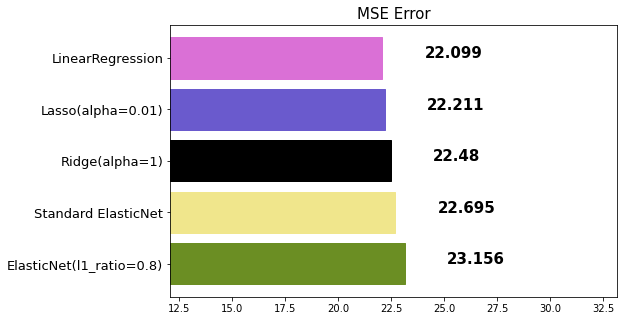

In [ ]:
elasticnet_pipeline.fit(x_train, y_train)
elasticnet_pred = elasticnet_pipeline.predict(x_test) # elasticnet_pipeline.fit(x_train, y_train).predict(x_test)으로 바로 학습과 예측도 가능
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

6) 다중 회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.782e+01, tolerance: 3.361e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


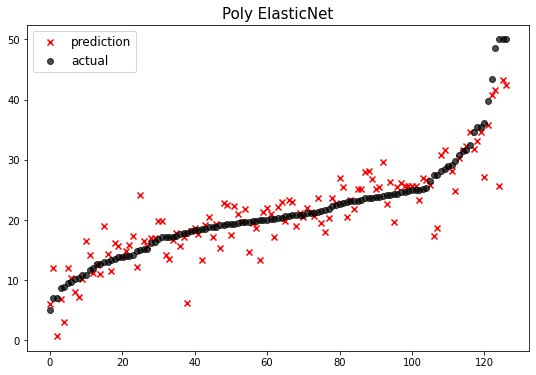

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Poly ElasticNet  15.710492


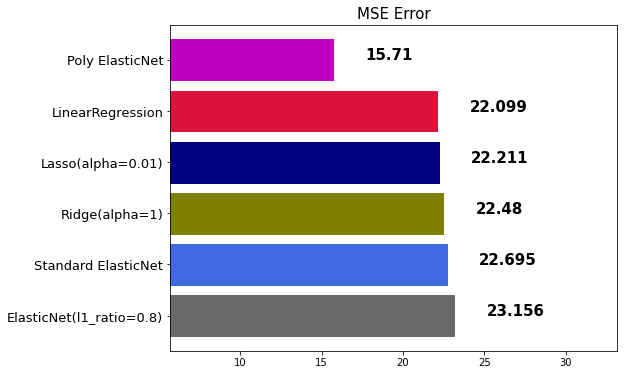

In [ ]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

## 2. **보팅** (Voting)
회귀 (Regression) 와  분류 (Classification)

Voting은 단어 뜻 그대로 **투표**를 통해 결정하는 방식입니다.

Voting은 Bagging과 투표방식이라는 점에서 유사하지만 다음과 같은 큰 차이점이 있습니다.

- Voting은 **다른 알고리즘 model을 조합**해서 사용합니다.
- Bagging은 같은 알고리즘 내에서 **다른 sample 조합**을 사용합니다.


### 2-1. 보팅 (Voting) - 회귀 (Regression)

In [ ]:
from sklearn.ensemble import VotingRegressor

반드시 **Tuple 형태**로 모델을 정의하고 리스트로 저장해야 합니다.

In [ ]:
single_models = [
    ('linear_reg', linear_reg), # 지정할 모델이름, 모델
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet_pipeline', elasticnet_pipeline),
    ('poly_pipeline', poly_pipeline)
]

In [ ]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [ ]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                       

In [ ]:
voting_pred = voting_regressor.predict(x_test)

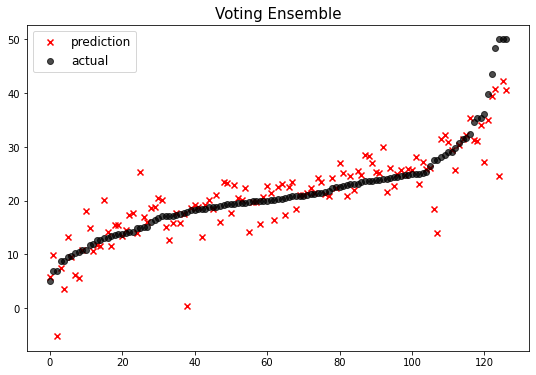

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Voting Ensemble  20.474757
6           Poly ElasticNet  15.710492


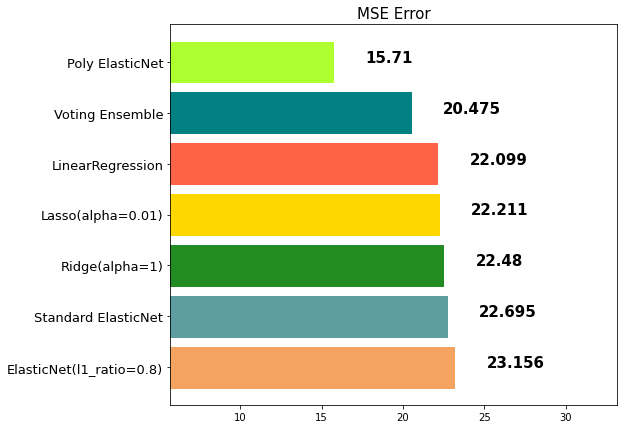

In [ ]:
mse_eval('Voting Ensemble', voting_pred, y_test)

### 2-2. 보팅 (Voting) - 분류 (Classification)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)

In [ ]:
from sklearn.ensemble import VotingClassifier

분류기 모델을 만들때 Voting 앙상블은 하나의 중요한 parameter인 **voting = {'hard', 'soft'}** 을 지정해야 한다.


#### case 1) **hard**로 설정한 경우
Hard Voting 방식에서는 결과 값에 대한 **다수 class를 차용**합니다.

class를 0, 1로 분류 예측을 하는 이진 분류를 예로 들어 보겠습니다.

분류를 예측한 값이 1, 0, 0, 1, 1 이라고 가정하면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1을 최종 값으로 예측을 하게 됩니다.

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [ ]:
models = [
    ('Logi', LogisticRegression()),
    ('ridge', RidgeClassifier())
]

In [ ]:
vc_hard = VotingClassifier(models, voting='hard')

#### case 2) **soft**로 설정한 경우
soft vote 방식은 **각 경우에 대한 확률의 평균** 값을 계산한다음에 **가장 확률이 높은 값**으로 확정짓게 됩니다.

분류를 예측한 값이 1, 0, 0, 1, 1 이 되고,
이때 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이고 class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6)이라고 가정하면

- class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44,
- class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4

로 앞선 Hard Vote 방식의 결과와는 다르게 0을 최종 결과 값으로 예측한다.

In [ ]:
models = [
    ('Logi', LogisticRegression()),
    ('ridge', RidgeClassifier())
]

In [ ]:
vc_soft = VotingClassifier(models, voting='soft')

## 3. **배깅** (Bagging)
회귀 (Regression) 와  분류 (Classification)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)

Bagging은 **Bootstrap Aggregating의 줄임말**입니다.

- Bootstrap(샘플) + Aggregating(합산)

Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식

데이터 셋의 구성이 [1, 2, 3, 4, 5]로 되어 있다면,

1. group 1 = [1, 2, 3]
2. group 2 = [1, 3, 4]
3. group 3 = [2, 3, 5]

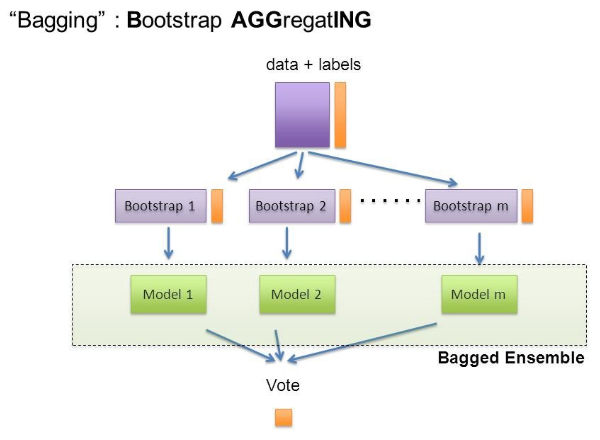

In [ ]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

### **Voting VS Bagging**
* Voting은 **여러 알고리즘의 조합**에 대한 앙상블
* Bagging은 하나의 **단일 알고리즘에 대하여 여러 개의 샘플 조합**으로 앙상블

### **대표적인 배깅(Bagging) 앙상블**
1. RandomForest
2. Bagging

### 3-1. **RandomForest**
- 의사결정나무(DecisionTree)기반의 Bagging 앙상블
- 굉장히 인기있는 앙상블 모델
- 사용성이 쉽고 성능도 우수함

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

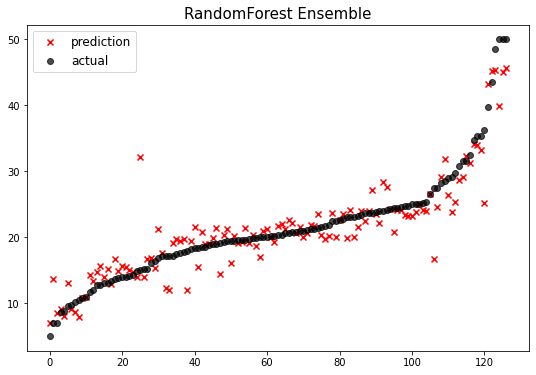

                      model        mse
0  ElasticNet(l1_ratio=0.8)  23.156236
1       Standard ElasticNet  22.694970
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Voting Ensemble  20.474757
6           Poly ElasticNet  15.710492
7     RandomForest Ensemble   9.911384


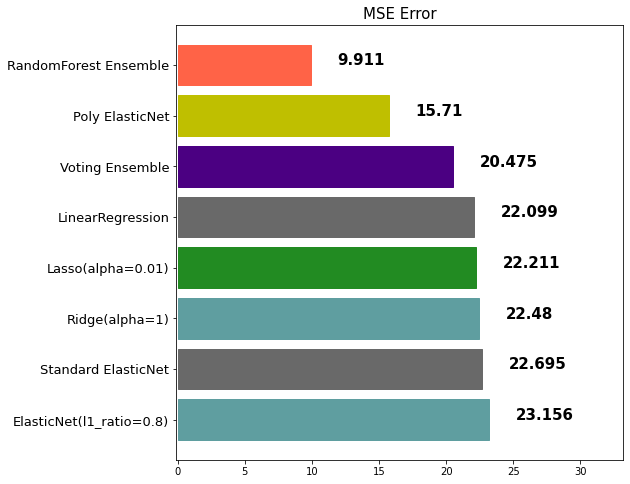

In [ ]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정, 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 개수
- max_depth: 트리가 깊어질 수 있는 최대 깊이. 과대적합 방지용
- n_estimators: 앙상블하는 트리의 개수
- max_features: 최대로 사용할 feature의 개수. 과대적합 방지용
- min_samples_split: 트리가 분할하기 위한 최소 샘플의 개수로 이 값보다 작으면 더이상 분할할 수 없다. default=2. 과대적합 방지용

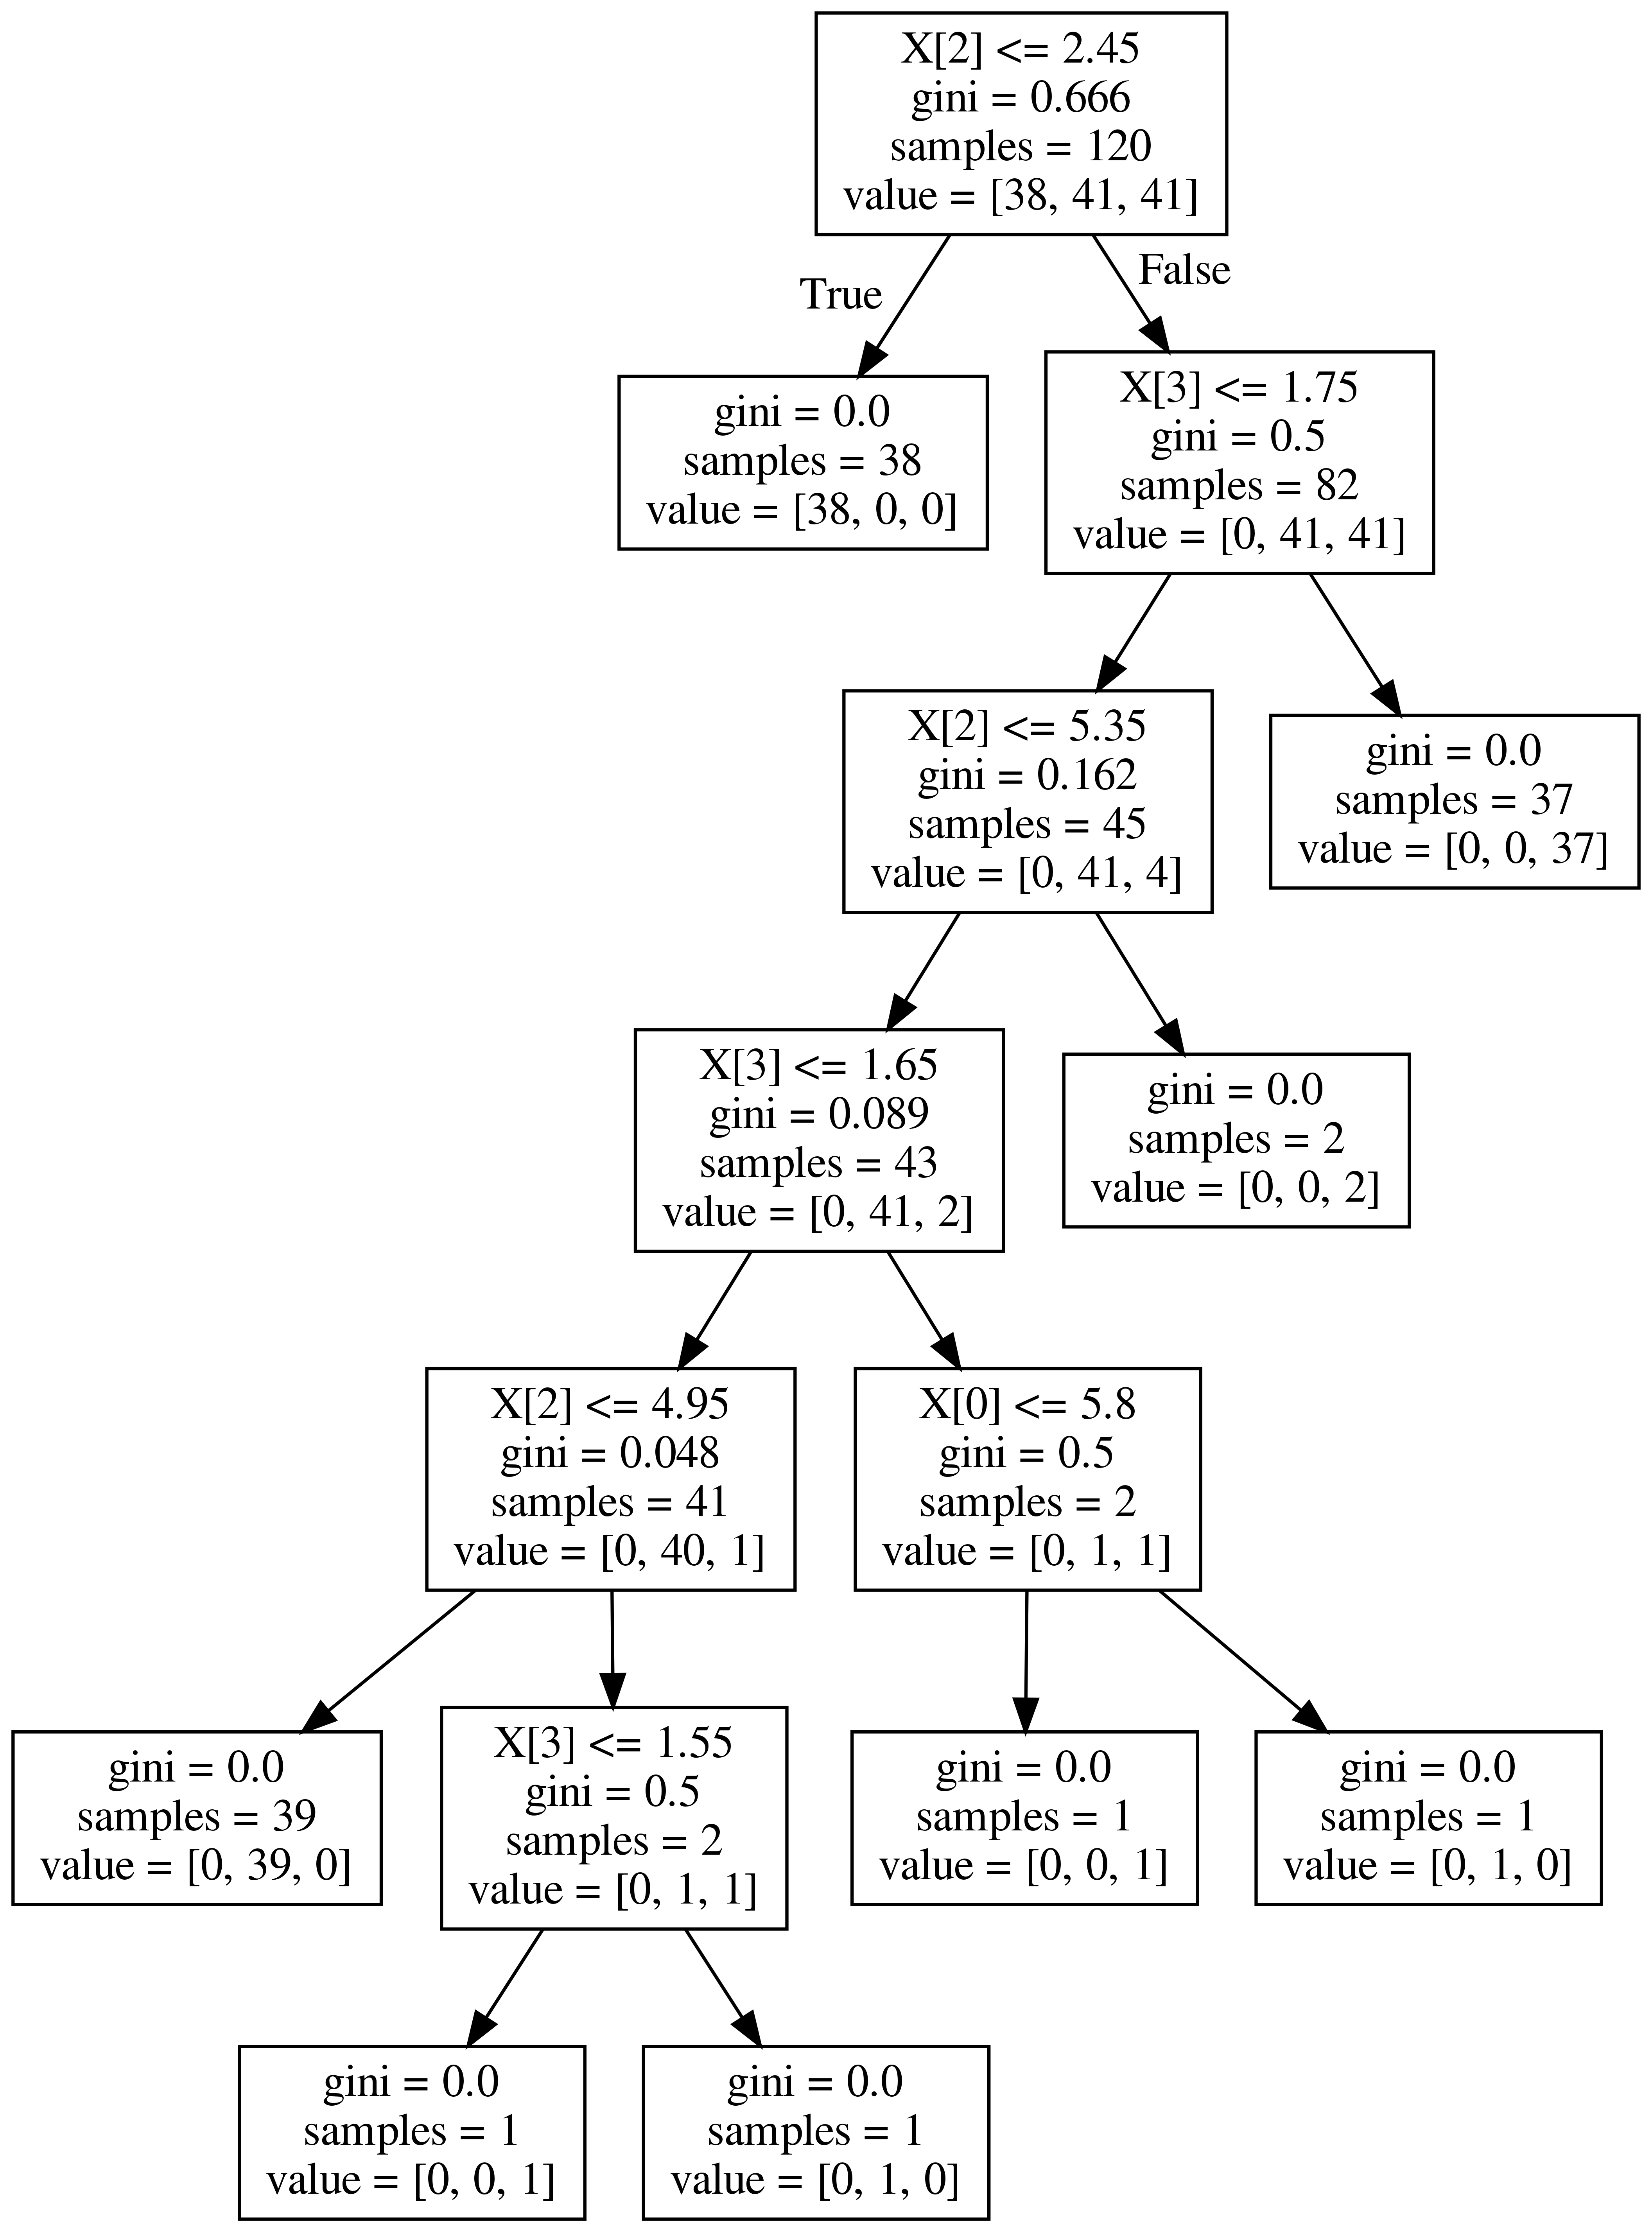

In [ ]:
Image('https://teddylee777.github.io/images/2020-01-09/decistion-tree.png', width=600)

하이퍼 파라미터를 튜닝 할 땐 반드시 **random_state 값을 고정**시킵니다.

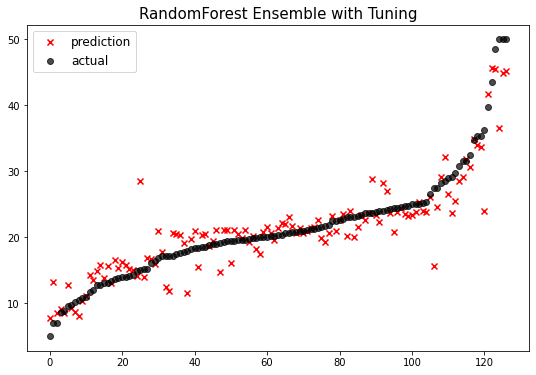

                               model        mse
0           ElasticNet(l1_ratio=0.8)  23.156236
1                Standard ElasticNet  22.694970
2                     Ridge(alpha=1)  22.480476
3                  Lasso(alpha=0.01)  22.210557
4                   LinearRegression  22.098695
5                    Voting Ensemble  20.474757
6                    Poly ElasticNet  15.710492
7  RandomForest Ensemble with Tuning  10.196040
8              RandomForest Ensemble   9.911384


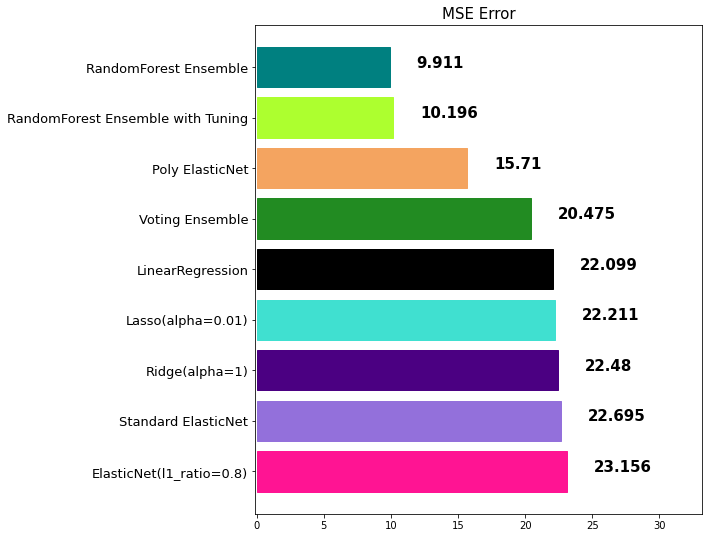

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=7, max_features=0.9)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble with Tuning', rfr_pred, y_test)

## 4. **부스팅** (Boosting)
약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 **가중치를 부여해 오차를 보완**해 나가는 방식

회귀 (Regression) 와  분류 (Classification)

[자세한 내용 보기]('https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3')

**장점**
- 성능이 매우 우수하다. (Lgbm, XGBoost)

**단점**
- 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 **잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감**할 수 있다.
- 다른 앙상블 대비 학습 시간이 오래걸린다.

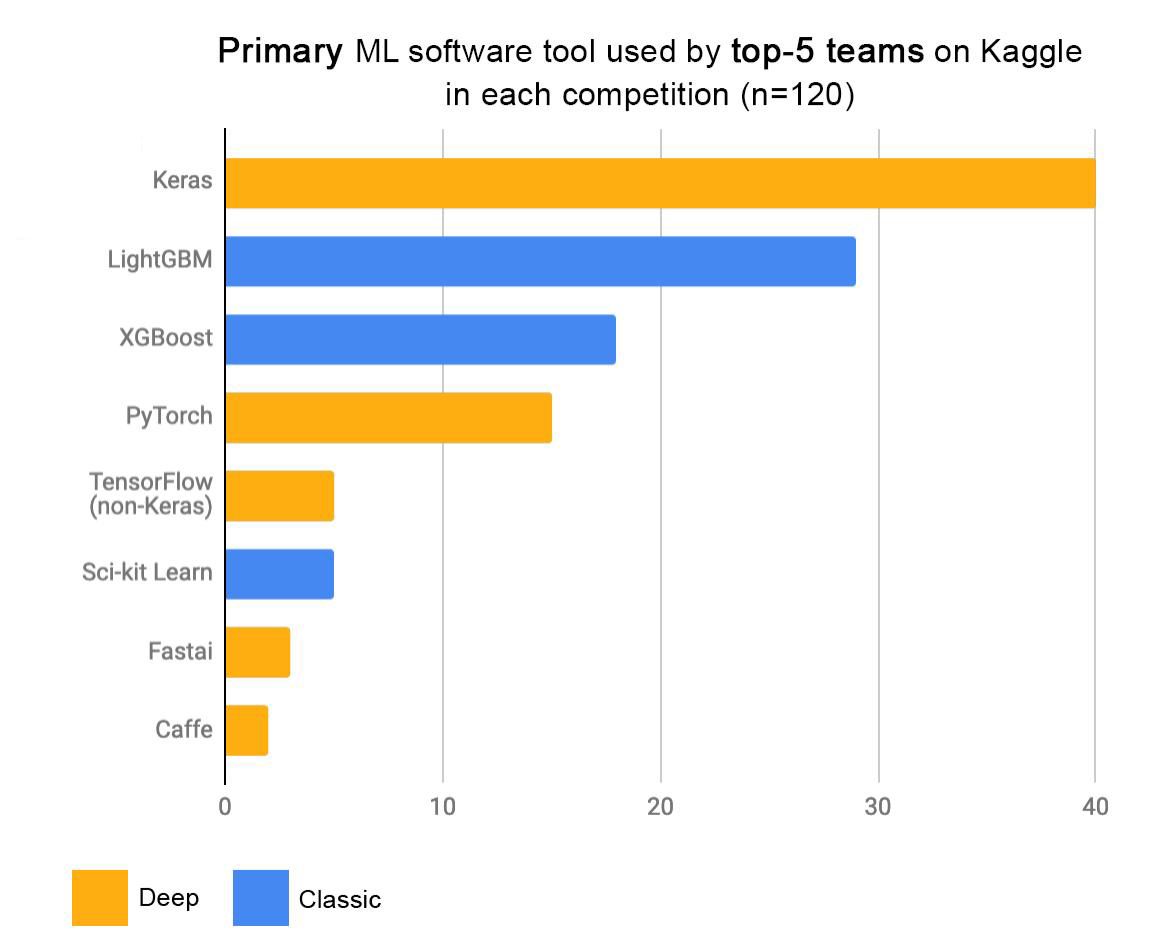

In [ ]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

### **대표적인 Boosting 앙상블**
1. GradientBoost
2. XGBoost
3. LightGBM (LGBM)
4. AdaBoost

### 4-1. **GradientBoost**
**주요 특징**
1. 성능이 우수하다.
2. 학습시간이 해도해도 너무 느리다.

회귀 (Regression) 와  분류 (Classification)

[GradientBoost 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradient%20boost#sklearn.ensemble.GradientBoostingRegressor)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

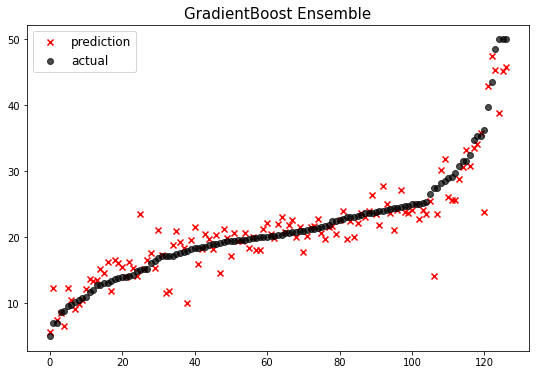

                               model        mse
0           ElasticNet(l1_ratio=0.8)  23.156236
1                Standard ElasticNet  22.694970
2                     Ridge(alpha=1)  22.480476
3                  Lasso(alpha=0.01)  22.210557
4                   LinearRegression  22.098695
5                    Voting Ensemble  20.474757
6                    Poly ElasticNet  15.710492
7  RandomForest Ensemble with Tuning  10.196040
8              RandomForest Ensemble   9.911384
9             GradientBoost Ensemble   8.956141


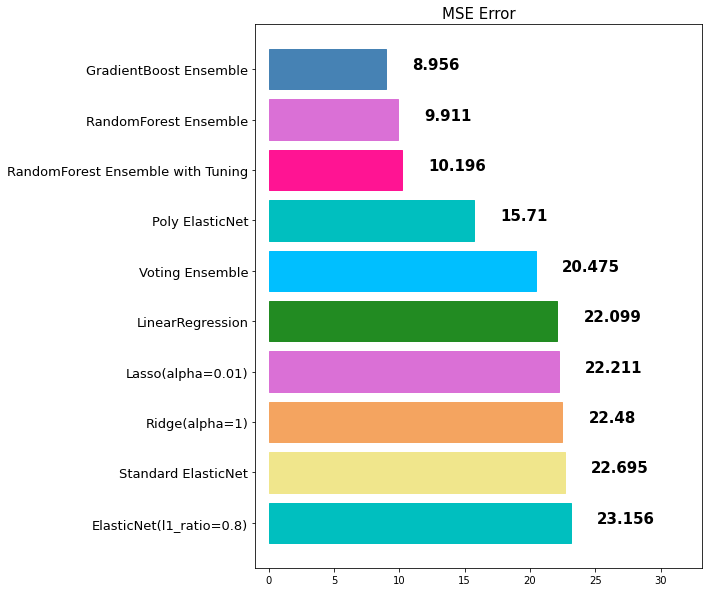

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', gbr_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값, 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리므로 적절한 값을 찾아야한다. n_estimators와의 곱을 유지하도록 같이 튜닝한다. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100, learning_rate와의 곱을 유지하도록 같이 튜닝한다.
- subsample: 샘플의 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용
- min_samples_split: 노드 분할시 최소 샘플의 갯수. default=2. 과대적합 방지용

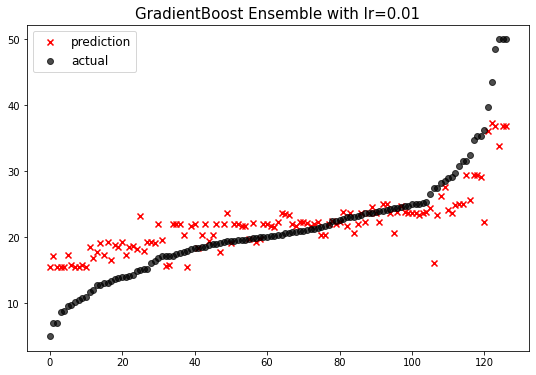

                                  model        mse
0              ElasticNet(l1_ratio=0.8)  23.156236
1                   Standard ElasticNet  22.694970
2                        Ridge(alpha=1)  22.480476
3                     Lasso(alpha=0.01)  22.210557
4                      LinearRegression  22.098695
5   GradientBoost Ensemble with lr=0.01  21.982151
6                       Voting Ensemble  20.474757
7                       Poly ElasticNet  15.710492
8     RandomForest Ensemble with Tuning  10.196040
9                 RandomForest Ensemble   9.911384
10               GradientBoost Ensemble   8.956141


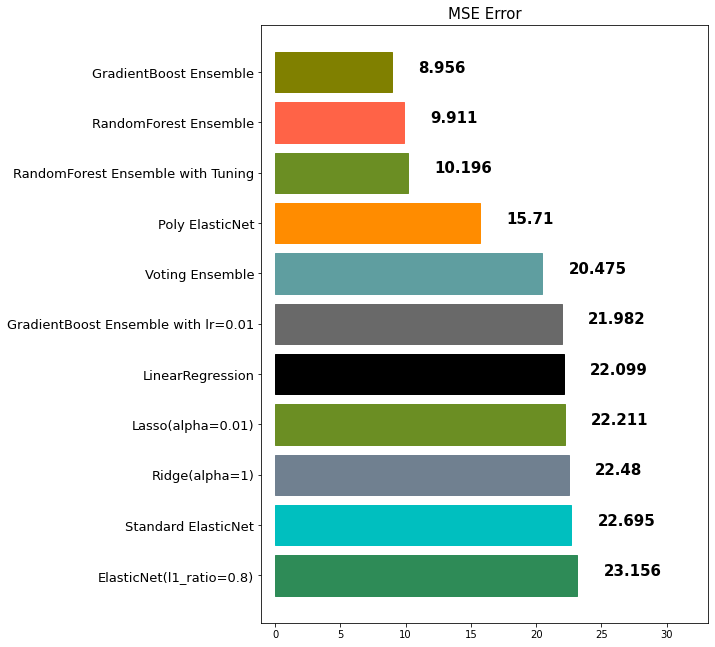

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble with lr=0.01', gbr_pred, y_test)

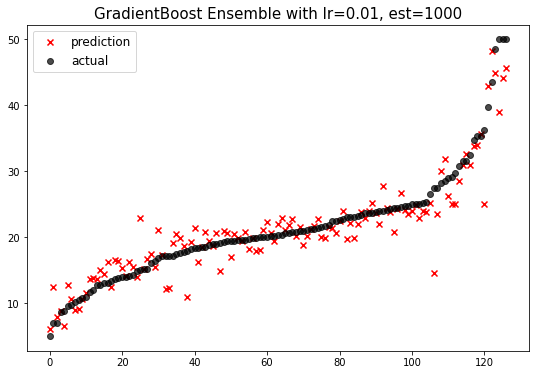

                                            model        mse
0                        ElasticNet(l1_ratio=0.8)  23.156236
1                             Standard ElasticNet  22.694970
2                                  Ridge(alpha=1)  22.480476
3                               Lasso(alpha=0.01)  22.210557
4                                LinearRegression  22.098695
5             GradientBoost Ensemble with lr=0.01  21.982151
6                                 Voting Ensemble  20.474757
7                                 Poly ElasticNet  15.710492
8               RandomForest Ensemble with Tuning  10.196040
9                           RandomForest Ensemble   9.911384
10                         GradientBoost Ensemble   8.956141
11  GradientBoost Ensemble with lr=0.01, est=1000   8.546408


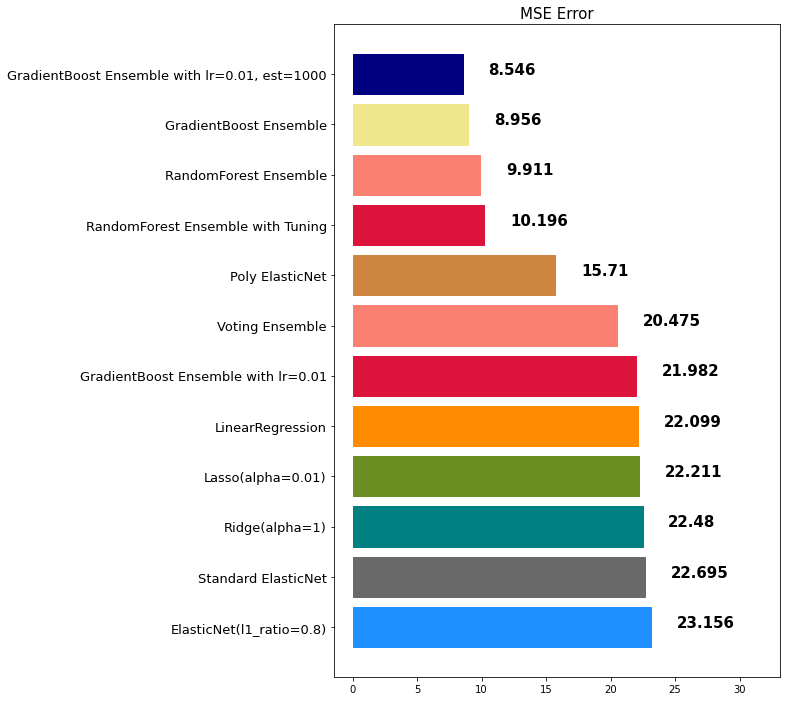

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000) # 두개의 곱이 100을 유지하도록 튜닝
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble with lr=0.01, est=1000', gbr_pred, y_test)

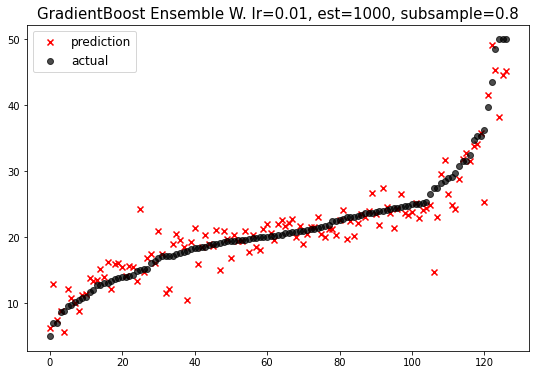

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                   RandomForest Ensemble with Tuning  10.196040
9                               RandomForest Ensemble   9.911384
10                             GradientBoost Ensemble   8.956141
11  GradientBoost Ensemble W. lr=0.01, est=1000, s...   8.887780
12      GradientBoost Ensemble with lr=0.01, est=1000   8.546408


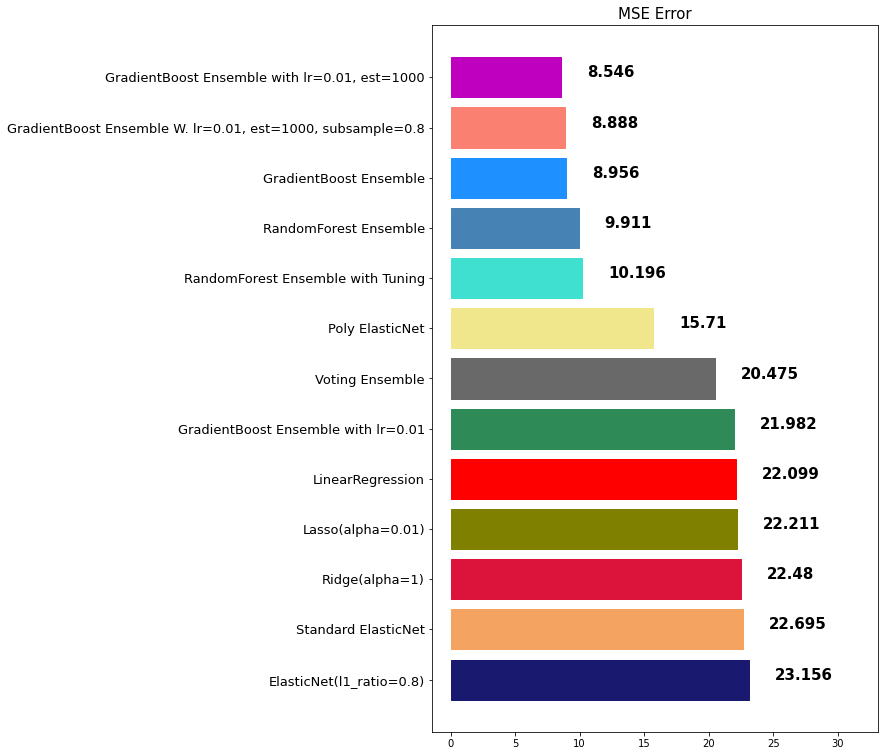

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble W. lr=0.01, est=1000, subsample=0.8', gbr_pred, y_test)

### 4-2. **XGBoost** : e**X**treme **G**radient **B**oosting
**주요 특징**
1. scikit-learn 패키지가 아니므로 다른 패키지로부터 임포트한다.
2. 성능이 우수하다.
3. GradientBoost보다는 빠르고 성능도 향상되었다.
4. 여전히 학습시간이 매우 느리다.

회귀 (Regression) 와  분류 (Classification)

[XGBoost 공식문서](https://xgboost.readthedocs.io/en/latest/)

In [ ]:
from xgboost import XGBRegressor, XGBClassifier

[09:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


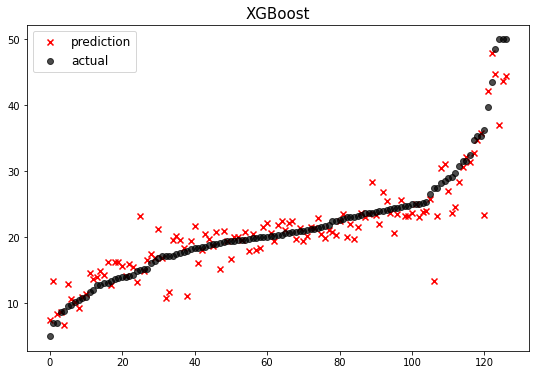

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                   RandomForest Ensemble with Tuning  10.196040
9                                             XGBoost  10.118980
10                              RandomForest Ensemble   9.911384
11                             GradientBoost Ensemble   8.956141
12  GradientBoost Ensemble W. lr=0.01, est=1000, s...   8.887780
13      GradientBoost Ensemble with lr=0.01, est=1000   8.546408


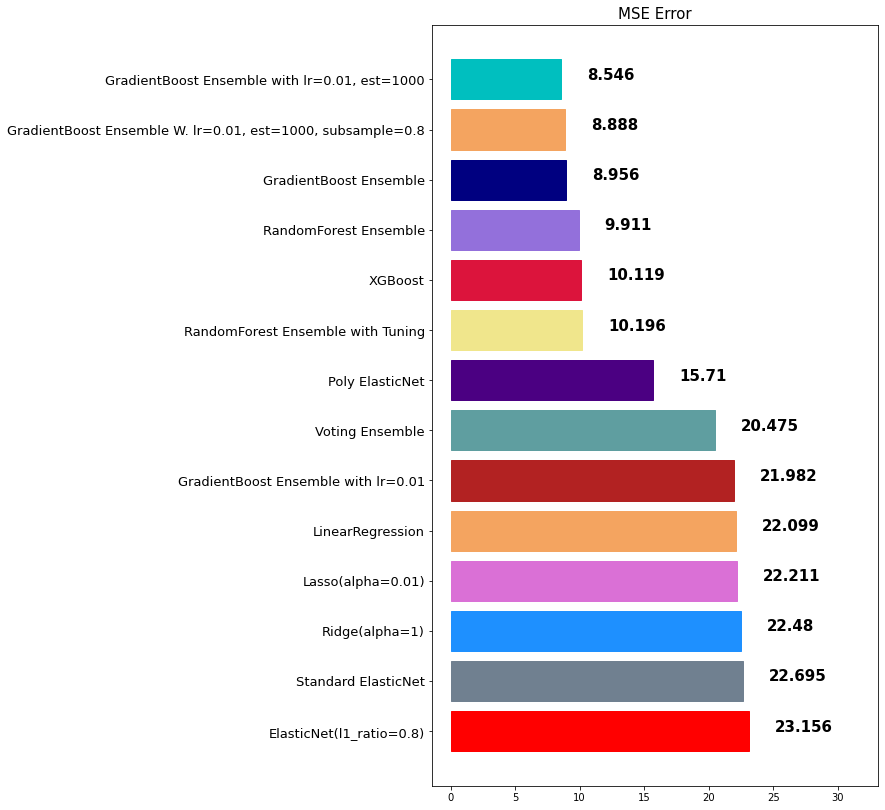

In [ ]:
xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값, 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율, 너무 큰 학습율은 성능을 떨어뜨리고 너무 작은 학습율은 학습이 느리므로 적절한 값을 찾아야함. n_estimators와의 곱을 유지하도록 같이 튜닝한다. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). learning_rage와의 곱을 유지하도록 같이 튜닝한다. default=100
- max_depth: 트리가 깊어질 수 있는 최대의 깊이. 과대적합 방지용. default=3.
- subsample: 샘플의 사용 비율. 과대적합 방지용. default=1.0
- max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

[09:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


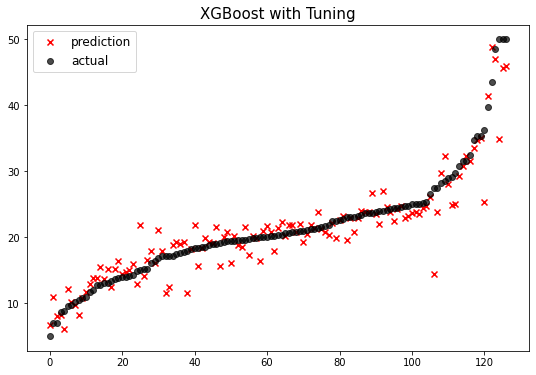

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                   RandomForest Ensemble with Tuning  10.196040
9                                             XGBoost  10.118980
10                              RandomForest Ensemble   9.911384
11                             GradientBoost Ensemble   8.956141
12  GradientBoost Ensemble W. lr=0.01, est=1000, s...   8.887780
13                                XGBoost with Tuning   8.594431
14      GradientBoost Ens

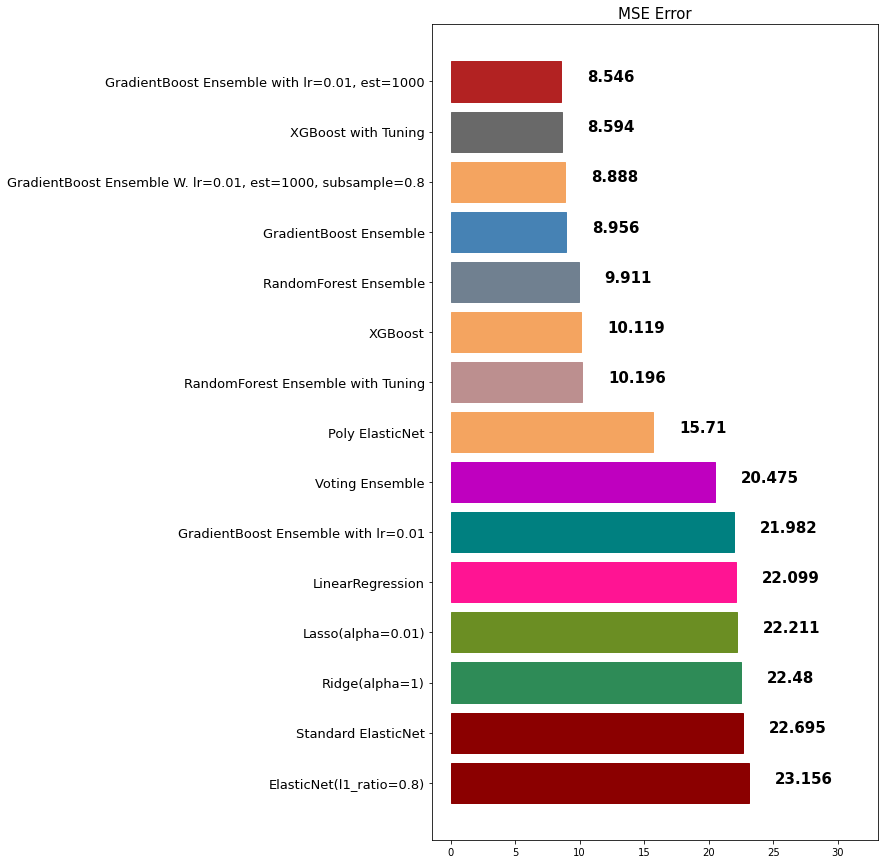

In [ ]:
xgb = XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.8, max_features=0.8, max_depth=7)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost with Tuning', xgb_pred, y_test)

### 4-3. **LightGBM**
**주요 특징**
1. scikit-learn 패키지가 아니므로 다른 패키지로부터 임포트한다.
2. 성능이 우수하다.
3. 속도가 매우 빠릅니다.

회귀 (Regression) 와  분류 (Classification)

[LightGBM 공식문서](https://lightgbm.readthedocs.io/en/latest/)

In [ ]:
from lightgbm import LGBMRegressor, LGBMClassifier

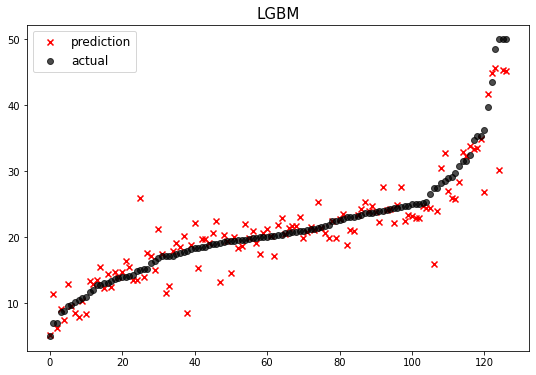

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                   RandomForest Ensemble with Tuning  10.196040
10                                            XGBoost  10.118980
11                              RandomForest Ensemble   9.911384
12                             GradientBoost Ensemble   8.956141
13  GradientBoost Ensemble W. lr=0.01, est=1000, s...   8.887780
14                       

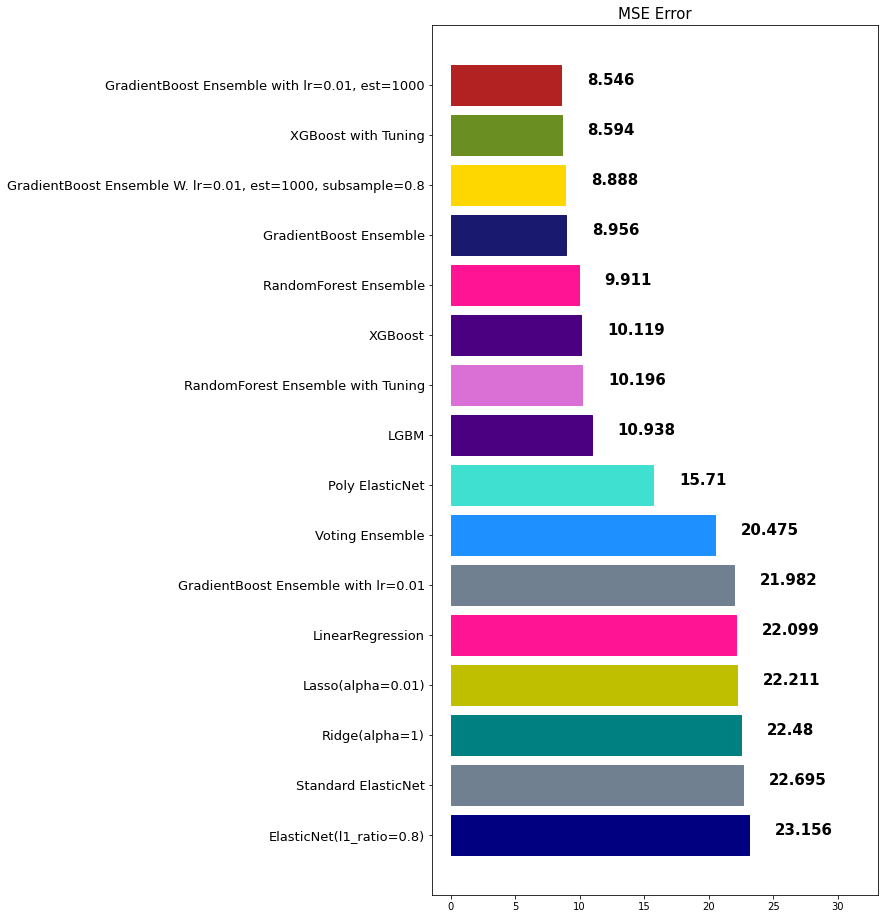

In [ ]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값, 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율, 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리므로 적절한 값을 찾아야함. n_estimators와의 곱을 유지하도록 같이 튜닝한다. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). learning_rate와의 곱을 유지하도록 같이 튜닝한다. default=100
- max_depth: 트리가 깊어질 수 있는 최대의 깊이. 과대적합 방지용. default=3.
- colsample_bytree: 샘플의 사용 비율 (max_features, subsample과 비슷한 개념). 과대적합 방지용. default=1.0

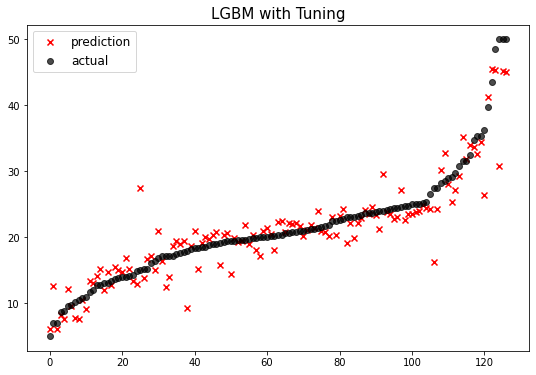

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                                    LGBM with Tuning  10.639619
10                  RandomForest Ensemble with Tuning  10.196040
11                                            XGBoost  10.118980
12                              RandomForest Ensemble   9.911384
13                             GradientBoost Ensemble   8.956141
14  GradientBoost Ensembl

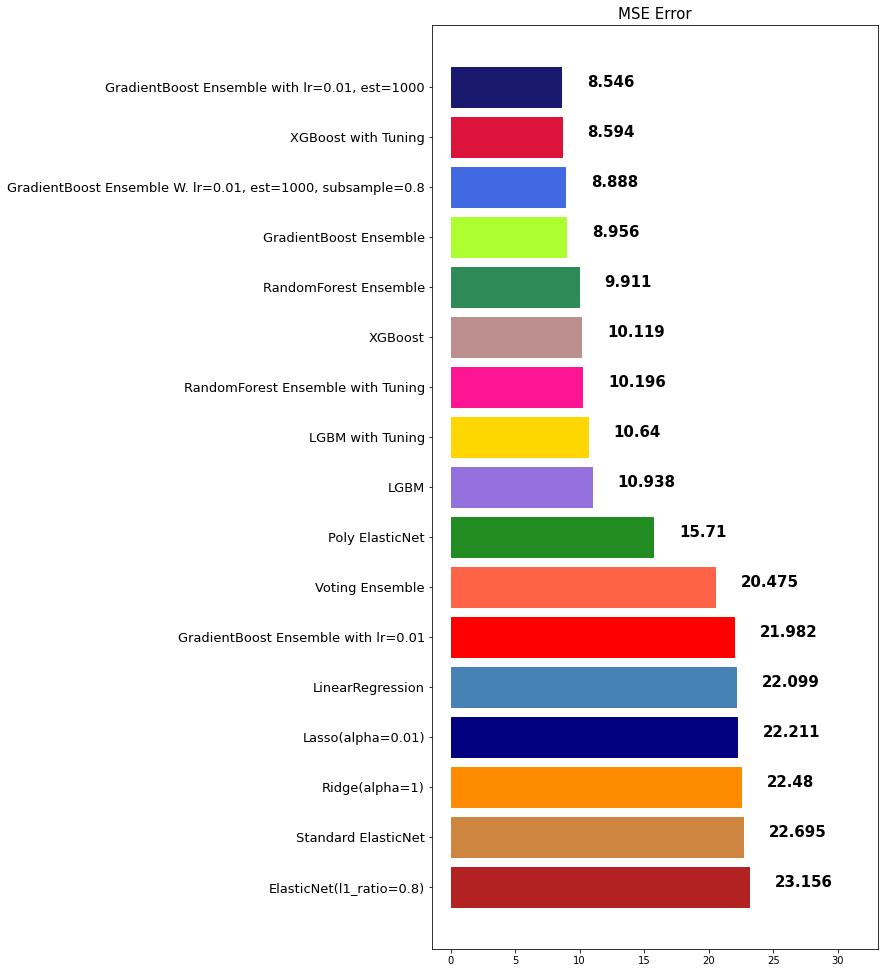

In [ ]:
lgbm = LGBMRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.8, subsample=0.8, max_depth=5)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM with Tuning', lgbm_pred, y_test)

## 5. **스태킹** (Stacking)
여러 모델을 기반으로 예측된 데이터를 학습 데이터로 사용하여 최종 meta 모델인 **final_estimator** 를 지정하여 종합하여 다시 한번 예측


**주요 특징**
1. 성능을 극으로 끌어올릴 때 활용하기도 한다.
2. 과대적합을 유발할 수 있다. (특히, 데이터셋이 적은 경우)

회귀 (Regression) 와  분류 (Classification)

[Stacking 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)


In [ ]:
from sklearn.ensemble import StackingRegressor, StackingClassifier

보팅과 동일하게 기반으로 사용할 여러 모델을 반드시 **Tuple 형태**로 정의하고 리스트로 저장해야 한다.

In [ ]:
stack_models = [
    ('poly elasticnet', poly_pipeline), # 지정할 모델이름, 모델
    ('randomforest', rfr),
    ('gbr', gbr),
    ('lgbm', lgbm),
]

다른 모델들을 기반으로 예측된 데이터를 학습 데이터로 사용하여 최종 예측할 모델을 **final_estimator**에 지정해야 한다.

In [ ]:
# 최종 모델로 XGBoost 사용
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

[09:15:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


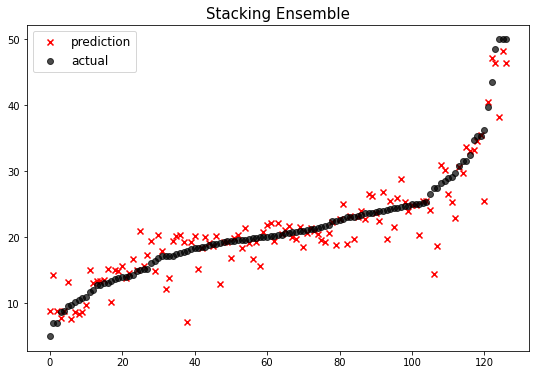

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                                    LGBM with Tuning  10.639619
10                  RandomForest Ensemble with Tuning  10.196040
11                                  Stacking Ensemble  10.152650
12                                            XGBoost  10.118980
13                              RandomForest Ensemble   9.911384
14                       

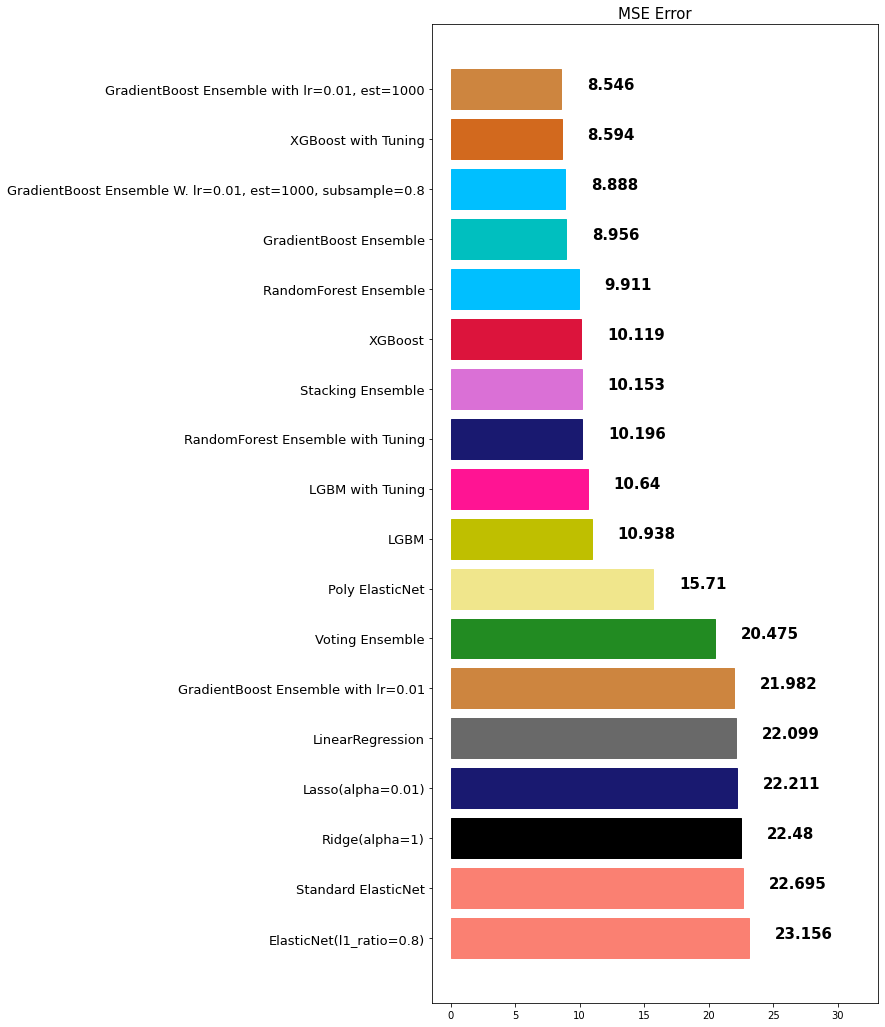

In [ ]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

### 6. **Weighted Blending**
스태킹과 매우 유사한 방법으로 각 모델의 **예측값에 대하여 가중치인 weight를 곱하여** 최종 output 계산
- 모델에 대한 가중치를 조절하여 최종 output을 산출합니다.
- **가중치의 합은 1.0**이 되도록 합니다.

각 모델의 예측값을 key와 value로 짝지어서 **dict** 형태로 저장한다.

In [ ]:
final_outputs = {
    'poly_elasticnet': poly_pred,
    'randomforest': rfr_pred,
    'gbr': gbr_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred,
    'stacking': stack_pred,
}

In [ ]:
final_prediction=\
final_outputs['poly_elasticnet'] * 0.1\
+final_outputs['randomforest'] * 0.1\
+final_outputs['gbr'] * 0.2\
+final_outputs['xgb'] * 0.2\
+final_outputs['lgbm'] * 0.2\
+final_outputs['stacking'] * 0.2\

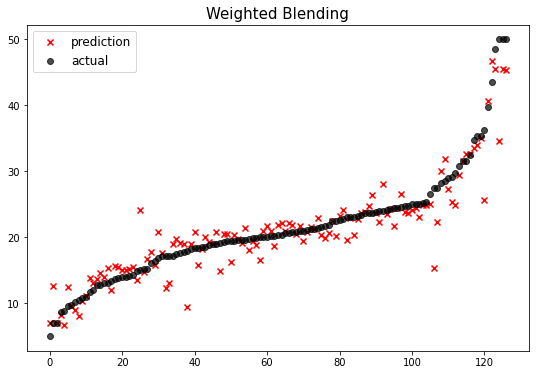

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                                    LGBM with Tuning  10.639619
10                  RandomForest Ensemble with Tuning  10.196040
11                                  Stacking Ensemble  10.152650
12                                            XGBoost  10.118980
13                              RandomForest Ensemble   9.911384
14                       

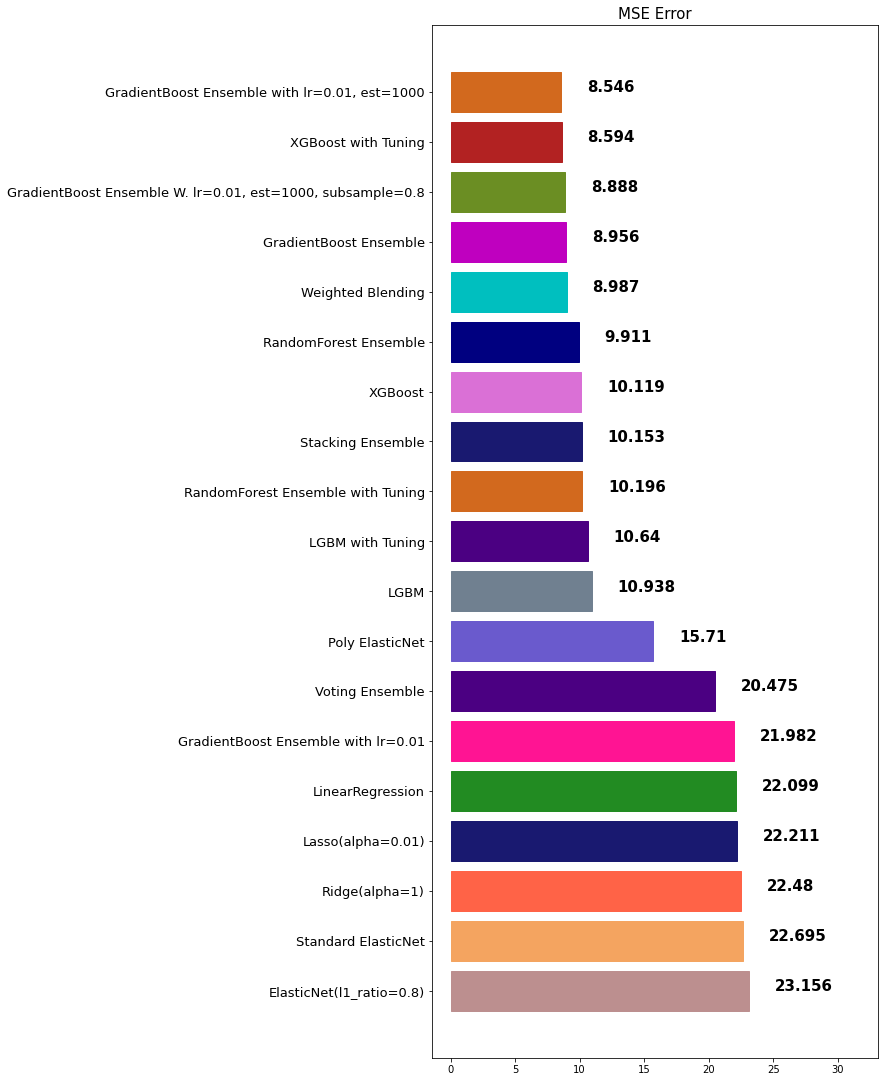

In [ ]:
mse_eval('Weighted Blending', final_prediction, y_test)

## 7. 앙상블 모델을 정리하며
1. 앙상블은 대체적으로 단일 모델 대비 성능이 좋다.
2. 앙상블 모델을 앙상블하는 기법인 Stacking과 Weighted Blending도 참고해 볼만 하다.
3. 앙상블 모델은 적절한 **Hyperparameter 튜닝**이 중요하다.
4. 앙상블 모델은 대체적으로 학습시간이 더 오래 걸리므로 모델 튜닝을 하는 데에 오랜 시간이 소요된다.

각각의 기본 앙상블 모델과 튜닝한 앙상블 모델의 MSE 값 비교

-> **GradientBoost Ensemble with lr=0.01, est=1000**의 MSE가 가장 작다.

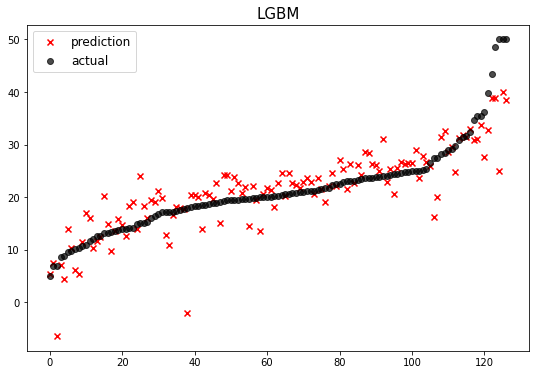

                                                model        mse
0                                                LGBM  23.156236
1                 GradientBoost Ensemble with lr=0.01  21.982151
2                                     Voting Ensemble  20.474757
3                                    LGBM with Tuning  10.639619
4                                   RandomSearch LGBM  10.399410
5                   RandomForest Ensemble with Tuning  10.196040
6                                   Stacking Ensemble  10.152650
7                                             XGBoost  10.118980
8                               RandomForest Ensemble   9.911384
9                                     GridSearch LGBM   9.767528
10                                  Weighted Blending   8.986927
11                             GradientBoost Ensemble   8.956141
12  GradientBoost Ensemble W. lr=0.01, est=1000, s...   8.887780
13                                XGBoost with Tuning   8.594431
14      GradientBoost Ens

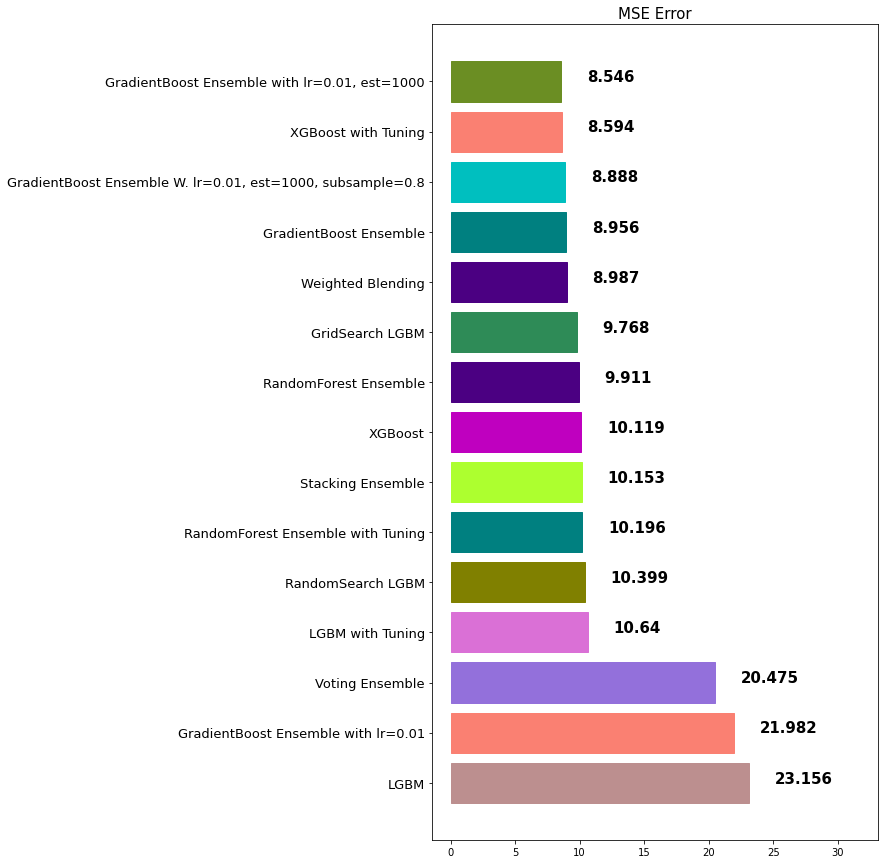

In [ ]:
mse_eval('LGBM', pred, y_test)

## 8. Cross Validation
Cross Validation이란 모델을 평가하는 하나의 방법으로 **K-겹 교차검증**(K-fold Cross Validation)을 많이 활용한다.


#### **K-겹 교차검증**
K-겹 교차 검증은 모든 데이터가 최소 한번은 테스트셋으로 쓰이도록 한다.

아래의 그림을 보면 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다.


[예시]
- Estimation 1일때 : 학습데이터: [B, C, D, E] / 검증데이터: [A]

- Estimation 2일때 : 학습데이터: [A, C, D, E] / 검증데이터: [B]

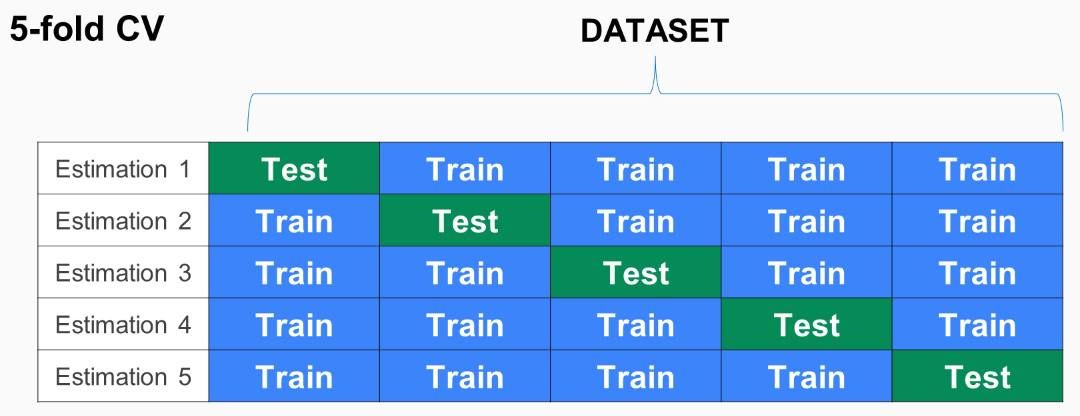

In [ ]:
# 왜 실행이 안될까?
Image('https://static.packt-cdn.com/products/9781789617740/graphics/b04c27c5-7e3f-428a-9aa6-bb3ebcd3584c.png', width=600)

K-Fold Cross Validation Set 만들기 : sklearn.model_selection으로부터 **KFold**를 임포트한다.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
n_splits = 5 # 데이터를 5개의 묶음으로 구분한다.
kfold = KFold(n_splits=n_splits)

In [ ]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
# numpy 배열 생성
X = np.array(df.drop('MEDV', 1))
Y = np.array(df['MEDV'])

K-겹 교차검증을 적용하여 학습 데이터와 검증 데이터로 분할하여 LightGBM 회귀 부스팅 앙상블을 적용한다.

In [ ]:
lgbm_fold = LGBMRegressor(random_state=42)

In [ ]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X): # train과 test로 분할한 인덱스 값에 대해 for 구문을 실행
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
    error = mean_squared_error(lgbm_pred_fold, y_test_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error)) # 각각의 데이터셋에 대한 MSE값 출력
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 9.00
Fold = 2, prediction score = 15.73
Fold = 3, prediction score = 18.18
Fold = 4, prediction score = 43.95
Fold = 5, prediction score = 24.96
------------------------------
Average Error: 22.36329584390587


## 9. Hyper-parameter 튜닝
Hypter-parameter 튜닝시 경우의 수가 너무 많으므로 이를 자동화할 필요가 있다.


sklearn 패키지에서 자주 사용되는 hyper-parameter 튜닝을 돕는 클래스는 다음 2가지가 있다.

1. **RandomizedSearchCV**
2. **GridSearchCV**

**적용하는 방법**

1. 사용할 Search 방법을 선택한다.
2. hyperparameter 도메인을 설정한다. (`max_depth`, `n_estimators`..등등)
3. 학습을 시킨 후 기다린다.
4. 도출된 결과 값을 모델에 적용하고 성능을 비교한다.

### 9-1. RandomizedSearchCV
- GridSearchCV와 달리, 모든 매개변수의 값이 테스트되는 것은 아니며 **지정된 분포에서 고정된 수의 매개변수 설정이 샘플링**된다.
- 시도되는 매개변수 설정의 수는 **n_iter**에 의해 주어진다.

**주요 Hyperparameter (LGBM)**
- random_state: 랜덤 시드 고정 값, 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율, 너무 큰 학습율은 성능을 떨어뜨리고 너무 작은 학습율은 학습이 느리므로 적절한 값을 찾아야한다. n_estimators와의 곱을 유지하도록 같이 튜닝한다. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). learning_rate와의 곱을 유지하도록 같이 튜닝한다. default=100
- max_depth: 트리가 깊어질 수 있는 최대의 깊이. 과대적합 방지용. default=3.
- colsample_bytree: 샘플의 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

각 parameter의 값이 될 수 있는 후보의 분포를 key와 value로 짝지어서 **dict** 형태로 저장한다.

In [ ]:
params = {
    'n_estimators': [200, 500, 1000, 2000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.8, 0.9, 1.0],
}

모델을 선언할때, **n_iter** 값을 조절하여 **총 몇 회의 시도**를 진행할 것인지 정의한다.

(회수가 늘어나면 더 좋은 parameter를 찾을 확률은 올라가지만 그만큼 시간이 오래 걸린다.)

In [ ]:
# 사용할 모델 알고리즘, 매개변수값 분포, K-겹 교차검증에 분할하는 그룹수(cv), 시도횟수, -MSE값 추출
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=42, cv=3, n_iter=25, scoring='neg_mean_squared_error')

In [ ]:
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

가장 최적의 scoring 값을 찾아준다.

In [ ]:
clf.best_score_

-13.666780812885968

가장 **최적의 parameter 조합**을 찾아준다.

In [ ]:
clf.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 2000,
 'subsample': 0.8}

**RandomizedSearchCV** 방법으로 찾은 최적의 parameter 조합으로 모델을 튜닝하고 학습하여 예측한 MSE 값을 구한다.

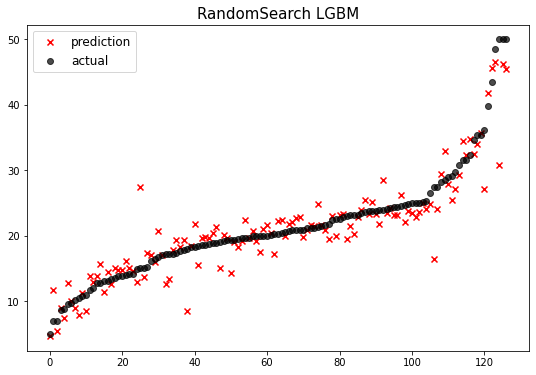

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                                    LGBM with Tuning  10.639619
10                                  RandomSearch LGBM  10.399410
11                  RandomForest Ensemble with Tuning  10.196040
12                                  Stacking Ensemble  10.152650
13                                            XGBoost  10.118980
14                       

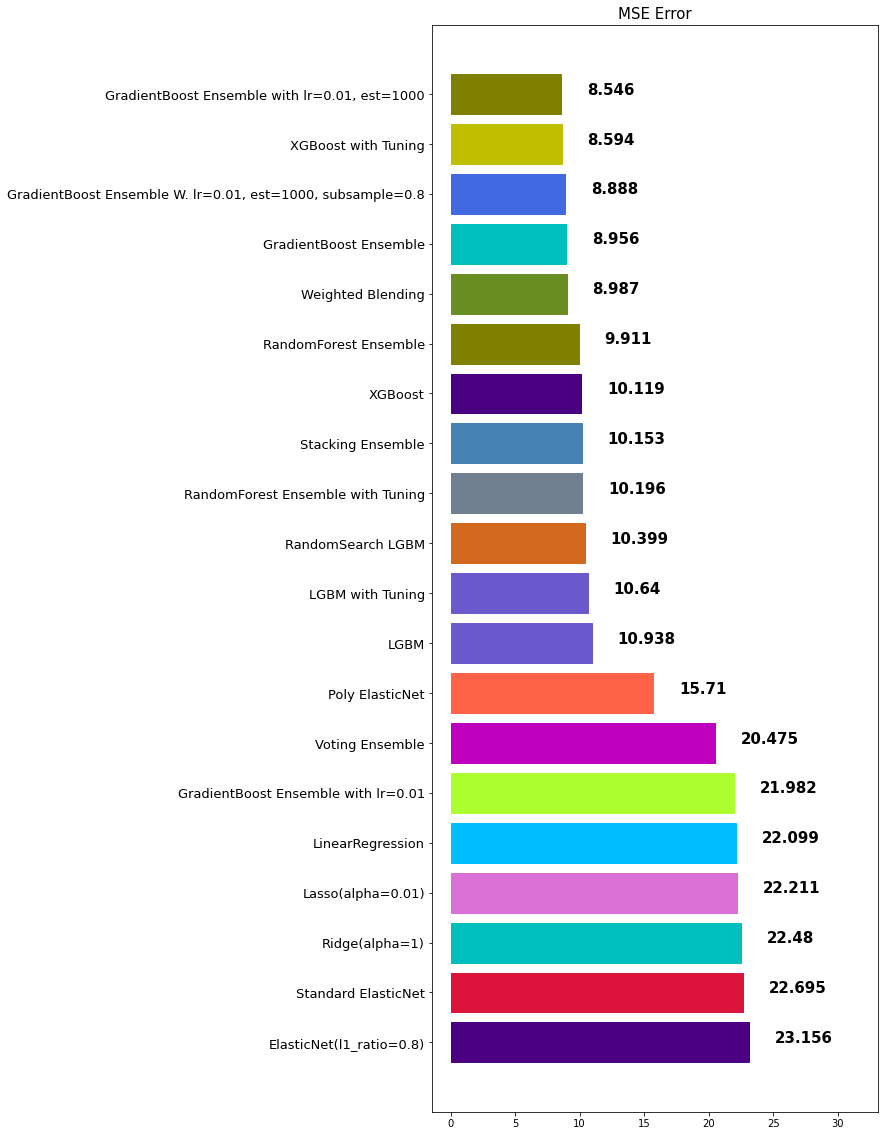

In [ ]:
lgbm_best = LGBMRegressor(n_estimators=2000, subsample=0.8, max_depth=7, learning_rate=0.01, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', lgbm_best_pred, y_test)

### 9-2. GridSearchCV
- 모든 매개 변수 값에 대하여 **횟수를 정하지 않고 완전 탐색**을 시도한다.
- 최적화할 parameter가 많다면 **시간이 매우 오래** 걸린다.

In [ ]:
from sklearn.model_selection import GridSearchCV

각 parameter의 값이 될 수 있는 후보의 분포를 key와 value로 짝지어서 **dict** 형태로 저장한다.

In [ ]:
params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [7, 8],
    'colsample_bytree': [0.8, 0.9],
    'subsample': [0.8, 0.9,],
}

In [ ]:
# 사용할 모델 알고리즘, 매개변수값 분포, K-겹 교차검증에 분할하는 그룹수(cv), 오래 걸리므로 모든 CPU 사용, -MSE값 추출
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

가장 최적의 scoring 값을 찾아준다.

In [ ]:
grid_search.best_score_

-13.836539667615929

가장 **최적의 parameter 조합**을 찾아준다.

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.8}

**GridSearchCV** 방법으로 찾은 최적의 parameter 조합으로 모델을 튜닝하고 학습하여 예측한 MSE 값을 구한다.

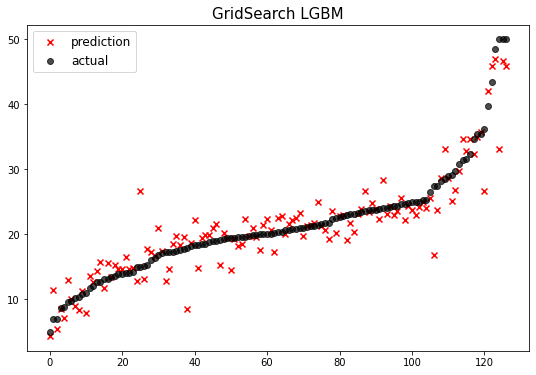

                                                model        mse
0                            ElasticNet(l1_ratio=0.8)  23.156236
1                                 Standard ElasticNet  22.694970
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5                 GradientBoost Ensemble with lr=0.01  21.982151
6                                     Voting Ensemble  20.474757
7                                     Poly ElasticNet  15.710492
8                                                LGBM  10.937726
9                                    LGBM with Tuning  10.639619
10                                  RandomSearch LGBM  10.399410
11                  RandomForest Ensemble with Tuning  10.196040
12                                  Stacking Ensemble  10.152650
13                                            XGBoost  10.118980
14                       

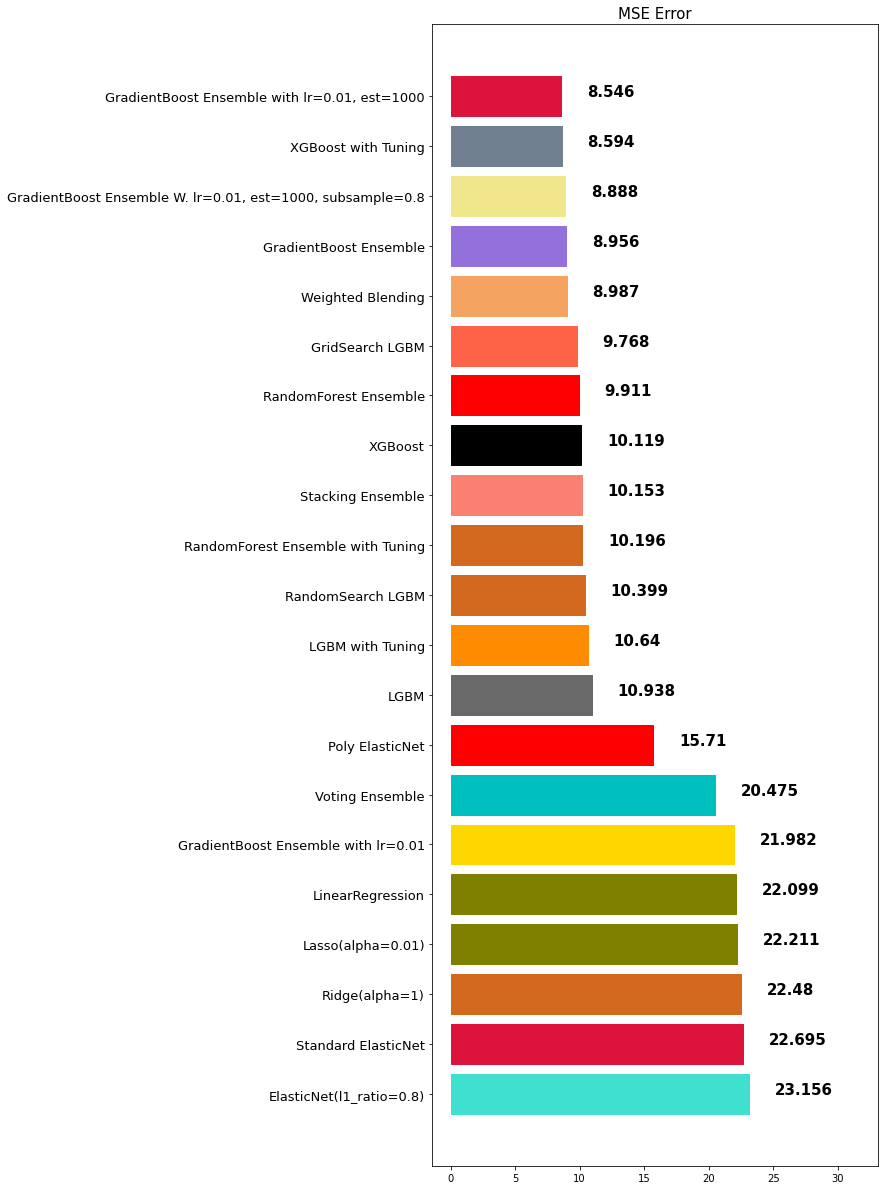

In [ ]:
lgbm_best = LGBMRegressor(n_estimators=500, subsample=0.8, max_depth=7, learning_rate=0.05, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)